In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import plotly.express as px


In [3]:
pd.set_option ('display.max_columns', None)

In [4]:
url='https://raw.githubusercontent.com/digipodium/Datasets/main/regression/kc_house_data.csv'
df= pd.read_csv(url)
print(df.shape)
df.head()


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

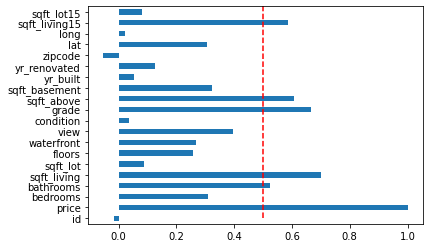

In [9]:
df.corrwith(df.price).plot(kind='barh')
plt.vlines(x=0.5, ymin=0, ymax=100, linestyles= 'dashed', colors='red')
plt.show()

In [11]:
cols=['bathrooms','sqft_living','grade',
        'sqft_above','sqft_living15']
df_selected=df[cols]
df_selected

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,1830
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1410


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(df_selected)
y= df.price

In [17]:
xtrain, xtest, ytrain, ytest= train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [18]:
dtrain= xgb.DMatrix(xtrain, label= ytrain)
dtest=  xgb.DMatrix(xtest, label=ytest )

In [20]:
params={
    'learning_rate':0.1,
    'max_depth': 6,
    'alpha': 0.1
}

In [21]:
results= xgb.cv(
    params,
    dtrain,
    num_boost_round=50,
    nfold= 5,
    early_stopping_rounds=5,
    metrics= 'rmse'
)

In [22]:
results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,591519.474314,2980.589573,592118.620782,13245.868392
1,541331.140230,2736.209315,542556.960723,13559.467639
2,496725.841136,2537.585911,498812.095952,14007.134044
3,457152.700511,2409.334942,460135.049246,14076.711352
4,422211.267772,2212.402062,426048.510017,14182.345943
5,391352.951816,2081.941257,396157.855562,14295.027334
6,364212.072091,1955.504019,370093.507867,14186.650491
7,340387.715371,1829.753816,347326.529247,14152.324125
8,319554.910516,1737.734489,327497.187696,13993.890719
9,301416.417277,1631.973826,310548.591040,14073.410528


In [25]:
px.line(results, x= 'num_boost_round', y= ['ytrain'])

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['train-rmse-mean', 'train-rmse-std', 'test-rmse-mean', 'test-rmse-std'] but received: num_boost_round